In [54]:
import numpy
import math
from matplotlib import pyplot
%matplotlib inline

In [55]:
N = 51
x_start, x_end = -1, 2
y_start, y_end = -0.5, 0.5
x = numpy.linspace(x_start, x_end,N)
y = numpy.linspace(y_start, y_end,N)
X, Y = numpy.meshgrid(x,y)

In [56]:
theta = numpy.linspace(0,2*numpy.pi,100)
r = 0.25
epsilon_x = 0.025
epsilon_y = 0.025
alpha = 0/180*numpy.pi

epsilon = -1*epsilon_x + 1j*epsilon_y
r_eps = math.sqrt(epsilon_x**2+epsilon_y**2)
aoa = 1/numpy.exp(1j*alpha)

z = r*numpy.exp(theta*1j)
z = z + epsilon
z = z + r_eps*numpy.exp(theta*1j)
zeta = z+r**2/z
zeta = zeta * aoa

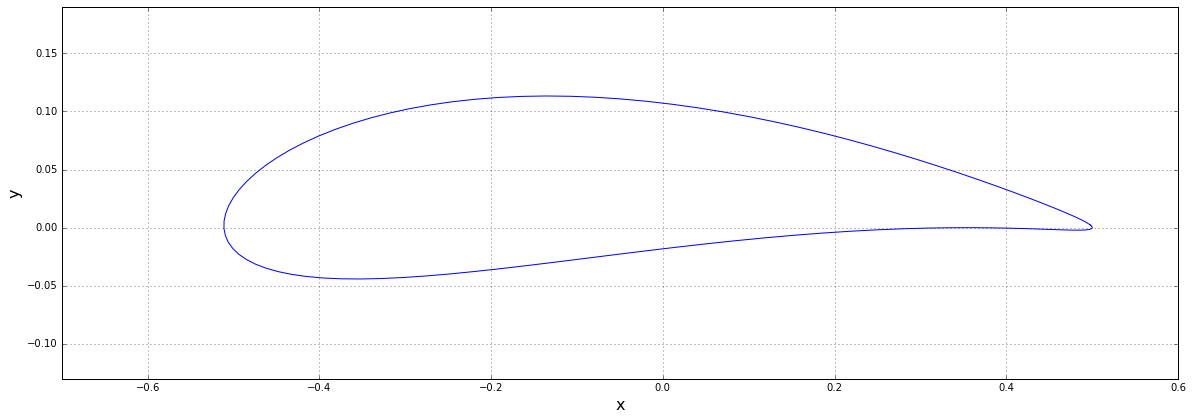

In [72]:
size = 20
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start/2-0.2, x_end/2-0.4)
pyplot.ylim(y_start/2+0.12, y_end/2-0.06)
pyplot.plot(zeta.real,zeta.imag)
pyplot.grid(1)

In [58]:
sigma_airfoil=numpy.loadtxt('../AeroPython/lessons/resources/NACA0012_sigma.txt')
x_airfoil = zeta.real
y_airfoil = zeta.imag

In [59]:
u_inf = 1.0
a = 0*numpy.pi

u_freestream = u_inf*math.cos(a)*numpy.ones((N,N),dtype = float)
v_freestream = u_inf*math.sin(a)*numpy.ones((N,N),dtype = float)

psi_freestream = u_inf*Y #(Y*math.cos(a)-X*math.sin(a))

In [60]:
def get_velocity(strength, xs, ys, X, Y):

    u = strength/(2*numpy.pi)*(X-xs)/((X-xs)**2+(Y-ys)**2)
    v = strength/(2*numpy.pi)*(Y-ys)/((X-xs)**2+(Y-ys)**2)
    
    return u, v

In [61]:
def get_stream_function(strength, xs, ys, X, Y):

    psi = strength/(2*numpy.pi)*numpy.arctan2((Y-ys), (X-xs))
    
    return psi

In [62]:
u_source_sum,v_source_sum,psi_source_sum = 0,0,0

for i in range(0,len(x_airfoil)):
    strength_source = sigma_airfoil[i]
    u_source, v_source = get_velocity(strength_source, x_airfoil[i], y_airfoil[i], X, Y)
    psi_source = get_stream_function(strength_source, x_airfoil[i], y_airfoil[i], X, Y)
    u_source_sum = u_source_sum + u_source
    v_source_sum = v_source_sum + v_source
    psi_source_sum = psi_source_sum + psi_source

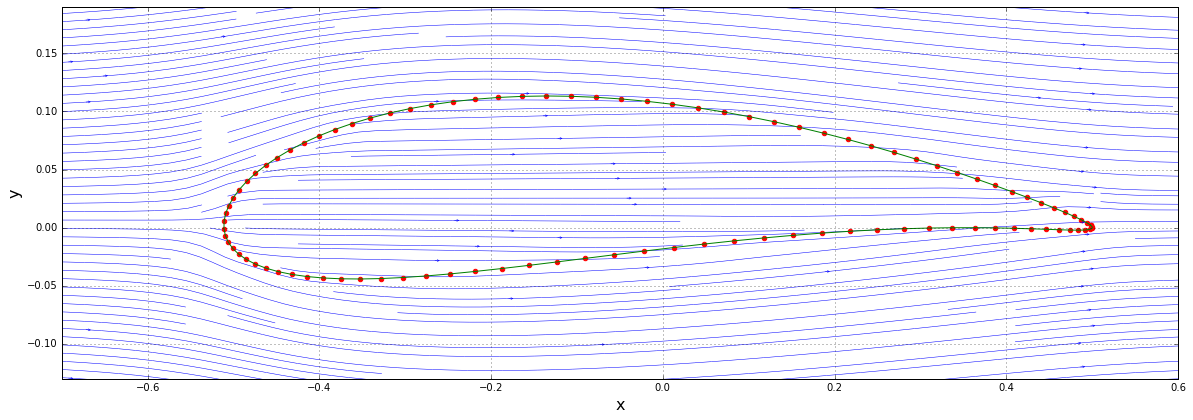

In [73]:
u = u_freestream + u_source_sum
v = v_freestream + v_source_sum
psi = psi_freestream + psi_source_sum


size = 20
pyplot.figure(figsize=(size, (y_end-y_start)/(x_end-x_start)*size))
pyplot.grid(True)
pyplot.xlabel('x', fontsize=16)
pyplot.ylabel('y', fontsize=16)
pyplot.xlim(x_start/2-0.2, x_end/2-0.4)
pyplot.ylim(y_start/2+0.12, y_end/2-0.06)
pyplot.streamplot(X, Y, u, v, density=5, linewidth=0.5, arrowsize=0.5, arrowstyle='->')

pyplot.scatter(x_airfoil, y_airfoil, color='r', s=20, marker='o')

pyplot.plot(x_airfoil,y_airfoil)